<h1>Setup</h1>

In [121]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.metrics import accuracy_score

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<h1>Get the Data</h1>
<h2>Download the Data</h2>

In [122]:
import os
import tarfile
import urllib.request

ECONOMIC_PATH = os.path.join("D:\\University\\Semester 8\\MIS")


In [123]:
import pandas as pd

def load_economic_data(economic_path=ECONOMIC_PATH):
    csv_path = os.path.join(economic_path, "economic.csv")
    return pd.read_csv(csv_path)

<h1>Take a Quick Look at the Data Structure</h1>

In [124]:
economic = load_economic_data()
economic.head()

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12


In [125]:
economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


In [126]:
economic["country"].value_counts()

country
United States of America    41
United Kingdom              41
India                       41
Japan                       41
Hong Kong                   41
China                       41
Germany                     41
France                      41
Spain                       41
Name: count, dtype: int64

In [127]:
economic.describe()

,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
count,369.000000,317.000000,369.000000,326.000000,369.000000,367.000000,350.000000,368.000000,348.000000,278.000000,365.000000,369.000000
mean,2000.000000,7898.648297,3.610542,0.041748,39.743171,27.897548,0.037114,20719.964674,0.068908,328.084820,-15.996384,0.059024
std,11.848225,7811.336862,0.482481,0.039579,25.452654,49.620521,0.037850,17435.037783,0.043207,622.395923,154.557170,0.033086
min,1980.000000,168.610000,2.230000,-0.040000,11.350000,0.900000,-0.110000,27.000000,0.020000,0.590000,-770.930000,0.010000
25%,1990.000000,2407.100000,3.320000,0.020000,19.410000,1.330000,0.020000,2090.250000,0.040000,80.380000,-25.370000,0.030000
50%,2000.000000,5160.100000,3.600000,0.030000,28.520000,5.440000,0.030000,19969.500000,0.060000,188.160000,-0.140000,0.050000
75%,2010.000000,10279.500000,3.980000,0.057500,57.880000,15.055000,0.060000,36384.000000,0.090000,271.977500,19.080000,0.080000
max,2020.000000,47751.330000,4.680000,0.240000,98.560000,249.050000,0.150000,65280.000000,0.260000,3868.460000,366.140000,0.140000


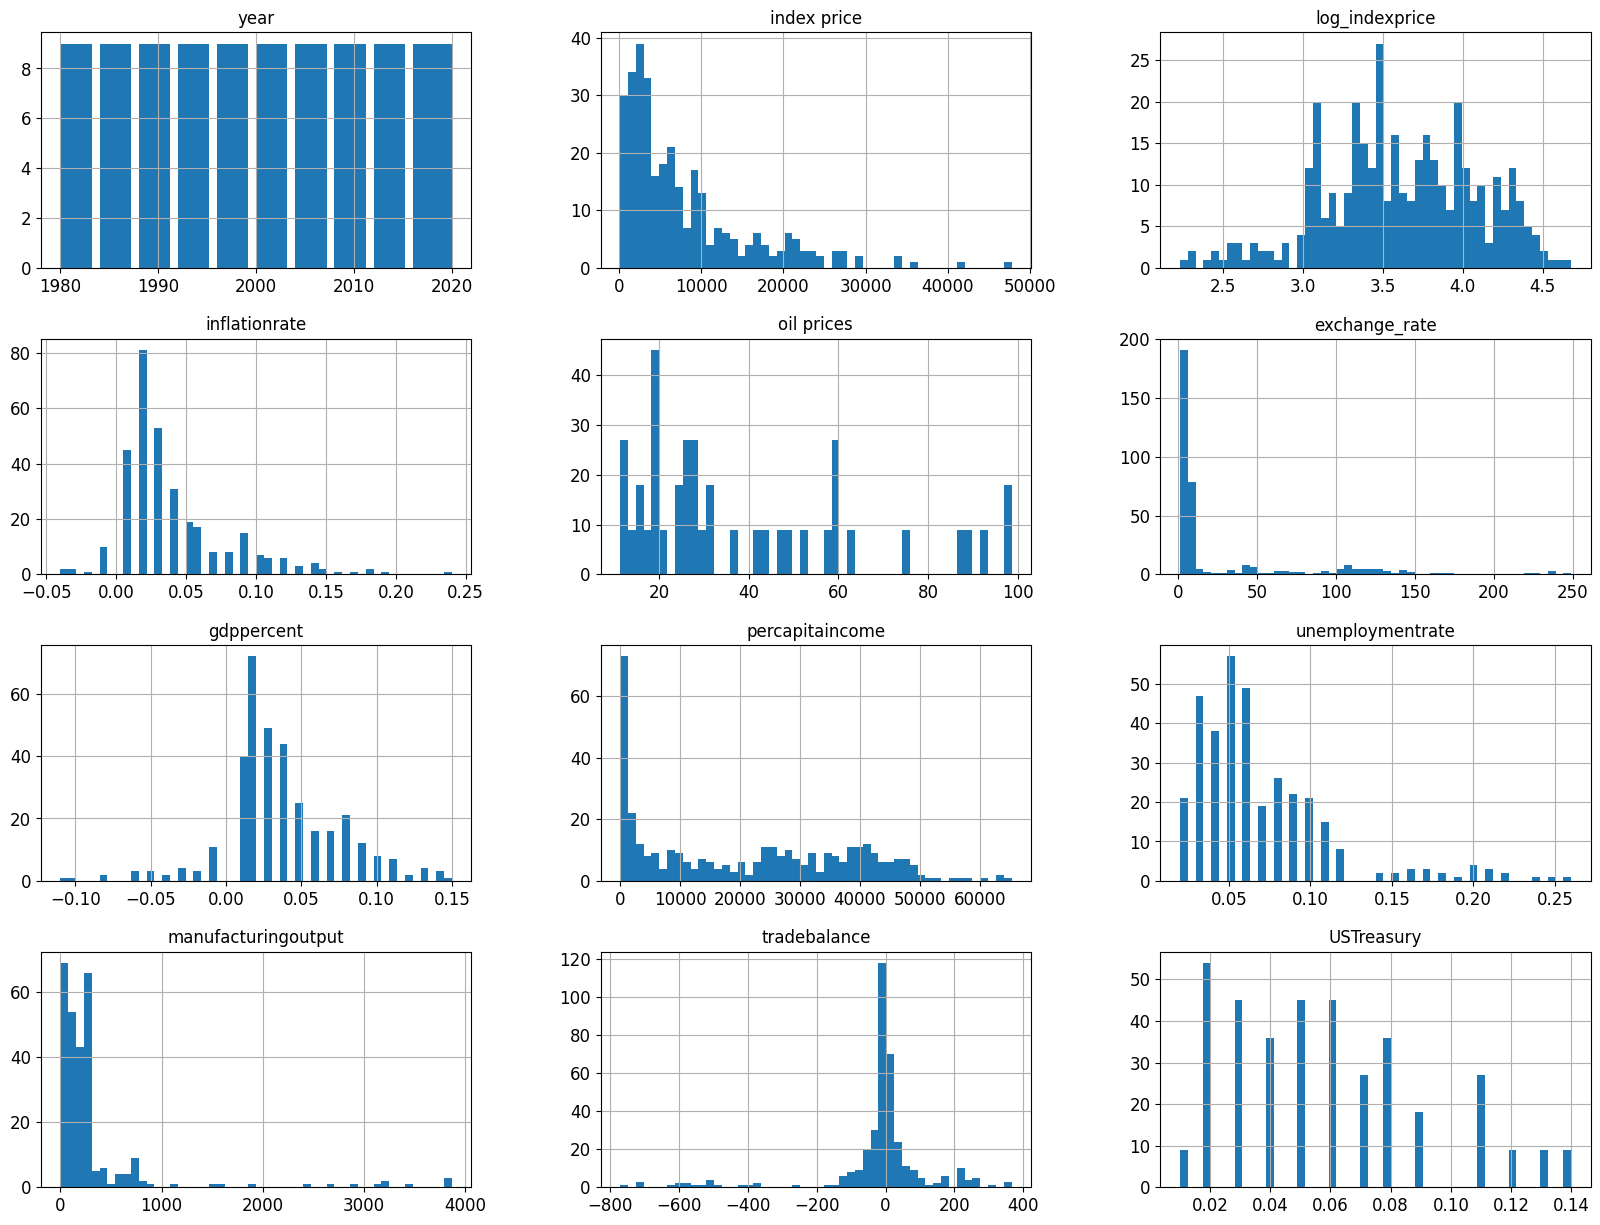

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
economic.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

<h1>Create a Test Set</h1>

In [129]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [130]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [131]:
train_set, test_set = split_train_test(economic, 0.2)
len(train_set)

296

In [132]:
len(test_set)

73

In [133]:
columns_to_drop = ["stock index", "USTreasury", "manufacturingoutput"]
economic = economic.drop(columns_to_drop, axis=1)

In [134]:
economic.head()

,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,tradebalance
0,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,-13.06
1,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,-12.52
2,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,-19.97
3,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,-51.64
4,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,-102.73


In [135]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(economic, test_size=0.2, random_state=42)

In [136]:
test_set.head()

,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,tradebalance
326,France,2019.0,5978.06,3.78,0.01,59.88,1.12,0.02,40380.0,0.08,-26.59
33,United States of America,2013.0,3541.29,3.55,0.01,97.63,1.00,0.02,53107.0,0.07,-490.78
15,United States of America,1995.0,925.19,2.97,0.03,19.03,1.00,0.03,28691.0,0.06,-89.76
345,Spain,1997.0,7255.40,3.86,0.02,18.33,146.45,0.04,89.0,0.18,0.01
57,United Kingdom,1996.0,4118.50,3.61,0.03,25.23,1.56,0.02,24335.0,0.08,2.38


<Axes: >

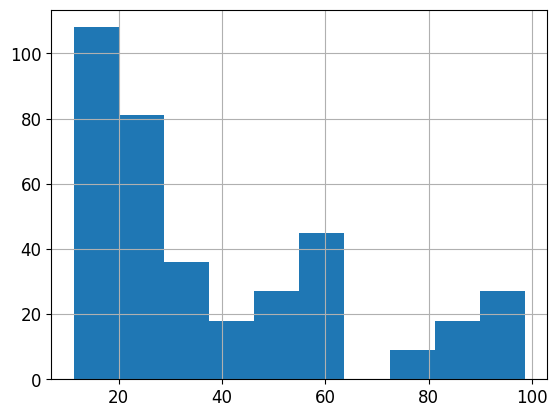

In [137]:
economic["oil prices"].hist()

In [138]:
economic["oil prices"] = pd.cut(economic["oil prices"],
                                bins=[0.5, 1, 15, 20, 40, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [139]:
economic["oil prices"].value_counts()

oil prices
5    144
4    117
3     72
2     36
1      0
Name: count, dtype: int64

<Axes: >

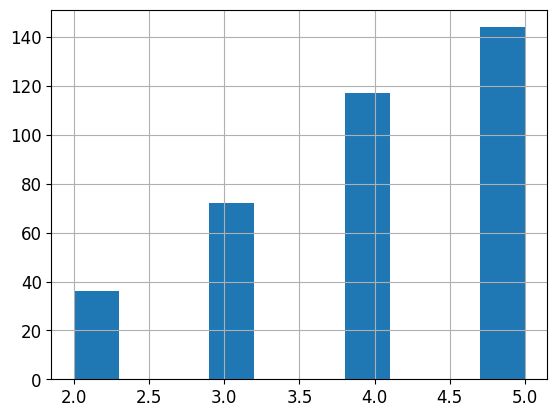

In [140]:
economic["oil prices"].hist()

In [141]:
economic.head()

,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,tradebalance
0,United States of America,1980.0,168.61,2.23,0.14,4,1.0,0.09,12575.0,0.07,-13.06
1,United States of America,1981.0,203.15,2.31,0.10,4,1.0,0.12,13976.0,0.08,-12.52
2,United States of America,1982.0,188.98,2.28,0.06,4,1.0,0.04,14434.0,0.10,-19.97
3,United States of America,1983.0,285.43,2.46,0.03,4,1.0,0.09,15544.0,0.10,-51.64
4,United States of America,1984.0,248.89,2.40,0.04,4,1.0,0.11,17121.0,0.08,-102.73


In [142]:
from sklearn.model_selection import StratifiedShuffleSplit

# economic[economic.isna().any(axis=1)]
economic.replace([np.inf, -np.inf], np.nan, inplace=True)
economic.dropna(axis=0, how="any", inplace=True)
# economic[economic.isna().any(axis=1)]
economic = economic.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(economic, economic["oil prices"]):
# #     print(train_index, test_index)
# #     print(19452 in train_index)
# #     print(19452 in test_index)
    strat_train_set = economic.loc[train_index]
    strat_test_set = economic.loc[test_index]

In [143]:
strat_test_set["oil prices"].value_counts() / len(strat_test_set)

oil prices
5    0.423077
4    0.269231
3    0.211538
2    0.096154
1    0.000000
Name: count, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split

def oil_proportions(data):
    return data["oil prices"].value_counts() / len(data)
train_set, test_set = train_test_split(economic, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": oil_proportions(economic),
    "Stratified": oil_proportions(strat_test_set),
    "Random": oil_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [145]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
oil prices,,,,,
1,0.000000,0.000000,0.000000,NaN,NaN
2,0.096154,0.096154,0.134615,40.000000,1.421085e-14
3,0.203846,0.211538,0.192308,-5.660377,3.773585e+00
4,0.273077,0.269231,0.307692,12.676056,-1.408451e+00
5,0.426923,0.423077,0.365385,-14.414414,-9.009009e-01


In [146]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("oil prices", axis=1, inplace=True)

<h2>Discover and Visualize the Data to Gain Insights</h2>

In [147]:
economic = strat_train_set.copy()


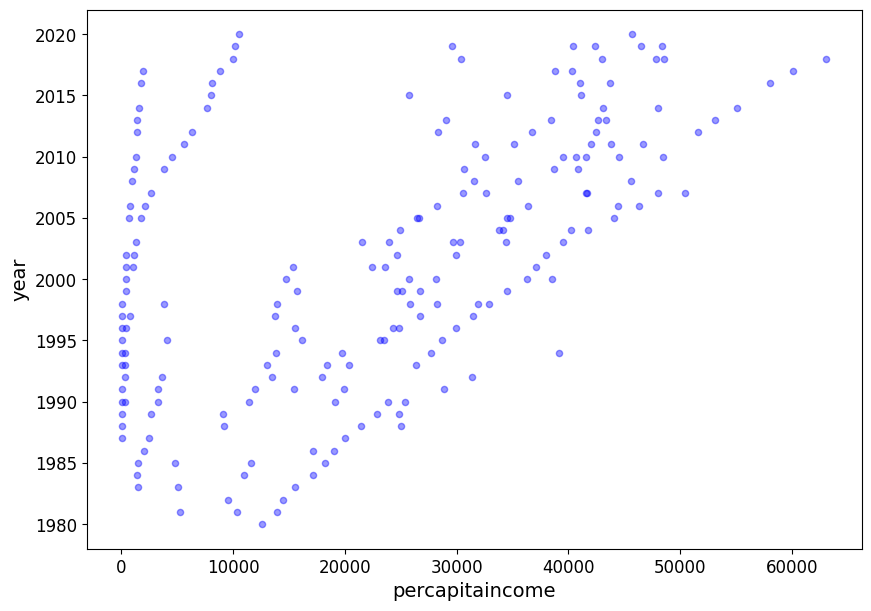

In [148]:
economic.plot(kind="scatter", x="percapitaincome", y="year", alpha=0.4, 
            figsize=(10,7),
            color="blue", # Вказати колір
            sharex=False)

plt.show()

In [151]:
numeric_data = economic.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
corr_matrix["percapitaincome"].sort_values(ascending=False)

percapitaincome     1.000000
year                0.499894
log_indexprice      0.288722
index price         0.185874
unemploymentrate   -0.197053
index              -0.232593
exchange_rate      -0.294863
tradebalance       -0.358668
inflationrate      -0.434724
gdppercent         -0.474449
Name: percapitaincome, dtype: float64

Saving figure scatter_matrix_plot


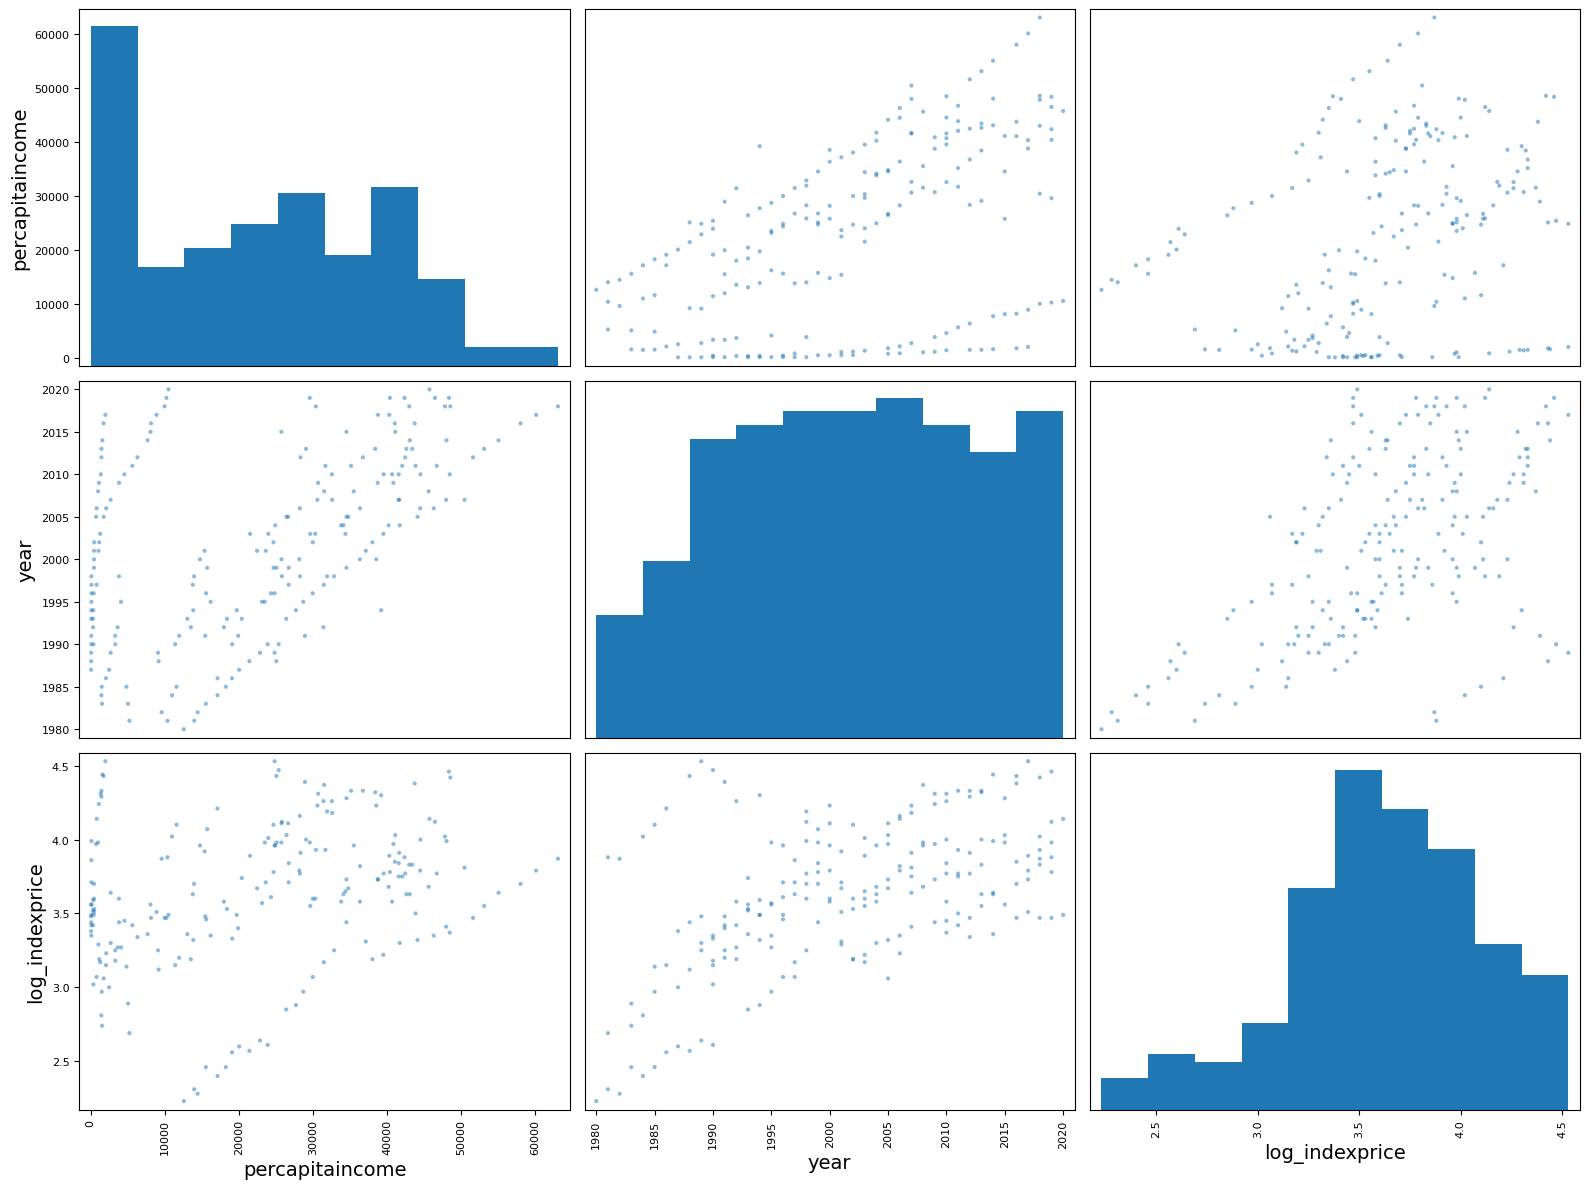

In [153]:
from pandas.plotting import scatter_matrix

attributes = ["percapitaincome", "year",
              "log_indexprice"]
scatter_matrix(economic[attributes], figsize=(16, 12))
save_fig("scatter_matrix_plot")

<h2>Prepare the Data for Machine Learning Algorithms</h2>

In [154]:
strat_train_set.drop("percapitaincome", axis=1, inplace=True)
strat_test_set.drop("percapitaincome", axis=1, inplace=True)
economic = strat_train_set.drop("year", axis=1)
economic_labels = strat_train_set["year"].copy()

In [155]:
economic.head()

,index,country,index price,log_indexprice,inflationrate,exchange_rate,gdppercent,unemploymentrate,tradebalance
12,13,United States of America,715.16,2.85,0.03,1.00,0.03,0.07,-65.17
156,236,China,2639.19,3.42,0.06,6.46,0.10,0.04,180.89
43,59,United Kingdom,5882.58,3.77,0.02,1.66,0.04,0.06,-11.17
36,51,United Kingdom,2143.50,3.33,0.08,1.78,0.01,0.07,-20.30
74,103,India,3262.33,3.51,0.04,47.22,0.05,0.06,-4.25


<h2>Transformation Pipelines</h2>

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Отримати список категоріальних і числових стовпців
categorical_cols = [cname for cname in economic.columns if
                    economic[cname].dtype == "object"]
numeric_cols = [cname for cname in economic.columns if 
                economic[cname].dtype in ['int64', 'float64']]

# Створення пайплайну обробки даних
numeric_transformer = StandardScaler()

# Створення пайплайну для категоріальних змінних
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# З'єднати обидва пайплайни в один
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Створити пайплайн для підготовки даних, що включає в себе обробку категоріальних і числових даних
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Застосувати пайплайн на вихідних даних
economic_prepared = full_pipeline.fit_transform(economic)

In [160]:
economic_prepared

array([[-1.50389078, -0.89901466, -1.62483684, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.46229869, -0.62747333, -0.43716325, ...,  0.        ,
         0.        ,  0.        ],
       [-1.09830909, -0.16972867,  0.29211   , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.85906338,  0.51623135,  0.83385585, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.44980191,  0.28573389,  0.6880012 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.54678884,  0.20902889,  0.62549206, ...,  1.        ,
         0.        ,  0.        ]])

In [161]:
economic_prepared.shape

(208, 17)

<h2>Select and Train a Model</h2>

<h3>Training and Evaluating on the Training Set</h3>


In [162]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(economic_prepared, economic_labels)

LinearRegression()

In [163]:
some_data = economic.iloc[:5]
some_labels = economic_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1993. 2011. 1998. 1990. 2001.]


In [164]:
print("Labels:", list(some_labels))

Labels: [1993.0, 2011.0, 1998.0, 1990.0, 2001.0]


In [166]:
some_data_prepared

array([[-1.50389078, -0.89901466, -1.62483684, -0.04707585, -0.48621347,
        -0.20997214, -0.11544612, -0.24402399,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.46229869, -0.62747333, -0.43716325,  1.04089932, -0.37513351,
         2.05461623, -0.78870203,  1.15985888,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.09830909, -0.16972867,  0.29211   , -0.40973424, -0.47278622,
         0.11354049, -0.33986476,  0.06407028,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-1.16884504, -0.69743083, -0.62469066,  1.7662161 , -0.47034491,
        -0.85699738, -0.11544612,  0.01197952,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        

In [167]:
from sklearn.metrics import mean_squared_error

economic_predictions = lin_reg.predict(economic_prepared)
lin_mse = mean_squared_error(economic_labels, economic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.000421219323239e-13

In [168]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(economic_labels, economic_predictions)
lin_mae

1.4757426050402081e-13

In [169]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(economic_prepared, economic_labels)

DecisionTreeRegressor(random_state=42)

In [170]:

economic_predictions = tree_reg.predict(economic_prepared)
tree_mse = mean_squared_error(economic_labels, economic_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<h2>Better Evaluation Using Cross-Validation</h2>

In [171]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, economic_prepared, economic_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [172]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6.66904719 4.38612531 4.0824829  3.55232989 2.19306266 2.27826166
 3.00792604 4.48807945 6.88839604 3.21714159]
Mean: 4.076285272499268
Standard deviation: 1.5436793696403377


In [173]:
lin_scores = cross_val_score(lin_reg, economic_prepared, economic_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.13805485e-13 1.31274253e-13 2.37954791e-13 1.48851011e-13
 2.21893986e-13 8.59391714e-14 1.40338079e-13 3.05859753e-13
 1.52526898e-13 2.38471523e-13]
Mean: 1.976914950551462e-13
Standard deviation: 7.325791064643122e-14


In [174]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(economic_prepared, economic_labels)

RandomForestRegressor(random_state=42)

In [175]:
economic_predictions = forest_reg.predict(economic_prepared)
forest_mse = mean_squared_error(economic_labels, economic_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.3431118788957148

In [176]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, economic_prepared, economic_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.58689546 5.02898409 3.82928316 3.44189248 1.90856466 3.55733581
 3.70850631 2.84252989 3.43264912 3.56422853]
Mean: 3.4900869507551753
Standard deviation: 0.7400352340240844


In [177]:
scores = cross_val_score(lin_reg, economic_prepared, economic_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.976915e-13
std      7.722062e-14
min      8.593917e-14
25%      1.424663e-13
50%      1.872104e-13
75%      2.383423e-13
max      3.138055e-13
dtype: float64

<h1>Fine-Tune Your Model</h1>
<h2>Grid Search</h2>

In [178]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 30 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(economic_prepared, economic_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [179]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [180]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10,
                      random_state=42)

In [181]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006600,0.001495,0.001599,4.898627e-04,False,2,3,"{'bootstrap': False, 'max_features': 2, 'n_est...",-33.777778,-17.031746,...,-20.578449,7.102811,6,-0.008032,-0.002677,-0.002677,-0.001331,-0.011643,-0.005272,0.003930
1,0.013601,0.000801,0.002000,6.324861e-04,False,2,10,"{'bootstrap': False, 'max_features': 2, 'n_est...",-20.014762,-10.318810,...,-13.450081,4.551821,3,-0.001928,-0.055211,-0.001205,-0.000958,-0.005030,-0.012866,0.021222
2,0.006001,0.000632,0.001801,3.993763e-04,False,3,3,"{'bootstrap': False, 'max_features': 3, 'n_est...",-31.656085,-18.936508,...,-18.922029,6.668327,5,-0.000000,-0.004016,-0.065596,-0.007984,-0.001331,-0.015785,0.025054
3,0.013020,0.000633,0.001800,3.999715e-04,False,3,10,"{'bootstrap': False, 'max_features': 3, 'n_est...",-16.935000,-11.004762,...,-11.606712,3.679972,1,-0.002380,-0.002530,-0.007229,-0.002515,-0.003443,-0.003619,0.001844
4,0.005199,0.000401,0.001001,4.623108e-07,False,4,3,"{'bootstrap': False, 'max_features': 4, 'n_est...",-21.727513,-9.600529,...,-17.126416,5.894610,4,-0.000000,-0.000000,-0.001339,-0.001331,-0.001331,-0.000800,0.000653
5,0.014800,0.001719,0.001800,4.003048e-04,False,4,10,"{'bootstrap': False, 'max_features': 4, 'n_est...",-22.777857,-7.628810,...,-12.384677,5.897574,2,-0.001175,-0.000964,-0.000120,-0.000958,-0.000120,-0.000667,0.000454


<h2>Randomized Search</h2>

In [182]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=10, high=200),
        'max_features': randint(low=1, high=5),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(economic_prepared, economic_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020FD73E93D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020FD67E1210>},
                   random_state=42, scoring='neg_mean_squared_error')

In [184]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.627771917533115 {'max_features': 3, 'n_estimators': 189}
4.112378428933059 {'max_features': 1, 'n_estimators': 24}
3.718028471059602 {'max_features': 3, 'n_estimators': 81}
4.060101467410371 {'max_features': 1, 'n_estimators': 30}
3.6333537733735928 {'max_features': 3, 'n_estimators': 131}
3.7016319698479445 {'max_features': 3, 'n_estimators': 84}
3.6669767032928218 {'max_features': 3, 'n_estimators': 97}
3.806953348109342 {'max_features': 1, 'n_estimators': 109}
3.586300346231209 {'max_features': 4, 'n_estimators': 161}
3.6425839851260746 {'max_features': 3, 'n_estimators': 159}


<h2>Analyze the Best Models and Their Errors</h2>

In [185]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.12133008, 0.19244175, 0.17488372, 0.05869939, 0.13799662,
       0.02587769, 0.062449  , 0.14307479, 0.02722816, 0.00364961,
       0.00779089, 0.00200269, 0.0022475 , 0.0184792 , 0.00389609,
       0.00784179, 0.01011101])

In [186]:
attributes = list(economic)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.19244175181036374, 'country'),
 (0.1748837195041413, 'index price'),
 (0.1430747918031287, 'unemploymentrate'),
 (0.13799661745107247, 'inflationrate'),
 (0.12133008171740335, 'index'),
 (0.06244900381527554, 'gdppercent'),
 (0.05869939442467014, 'log_indexprice'),
 (0.027228158825864882, 'tradebalance'),
 (0.02587769036963676, 'exchange_rate')]

<h2>Evaluate Your System on the Test Set</h2>

In [187]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("year", axis=1)
y_test = strat_test_set["year"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [188]:
final_rmse

3.895485552830051

In [189]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.38638195, 4.96535966])

In [190]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2.386381948001327, 4.965359662992067)

In [191]:

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(2.433040003799849, 4.942664435759819)